In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
import warnings
import datetime as dt
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# use pandas to read the first csv file "SPD_Crimes_Early.csv" from the Resources folder and set the index to 'Offense ID'
spd_crimes_early = pd.read_csv(
    "./Resources/SPD_Crimes_Early.csv",
    index_col='Offense ID'
)

# use str.slice to remove the time stamp from the 'Report DateTime' folder
spd_crimes_early['Report DateTime'] = spd_crimes_early['Report DateTime'].str.slice(0, 10)

# use the pandas to_datetime function to change the 'Report DateTime' column type to datetime
spd_crimes_early['Report DateTime'] = pd.to_datetime(spd_crimes_early['Report DateTime'])

# display the dataframe
spd_crimes_early.head()

Report Number  Offense Start DateTime    Offense End DateTime  \
Offense ID                                                                  
12605873663   2020-044620  02/05/2020 10:10:00 AM                     NaN   
12605598696   2020-044452  02/03/2020 08:00:00 AM  02/04/2020 08:00:00 AM   
12605567653   2020-044465  02/02/2020 08:30:00 PM  02/02/2020 09:30:00 PM   
12605174036   2020-044225  02/05/2020 01:17:00 AM  02/05/2020 02:21:00 AM   
12605081469   2020-044076  02/05/2020 12:51:21 AM                     NaN   

            Report DateTime Group A B Crime Against Category  \
Offense ID                                                     
12605873663      2020-02-05         A                SOCIETY   
12605598696      2020-02-05         A               PROPERTY   
12605567653      2020-02-05         A               PROPERTY   
12605174036      2020-02-05         A               PROPERTY   
12605081469      2020-02-05         B                SOCIETY   

                                 Offense Parent Group  \
Offense ID                                              
12605873663                    DRUG/NARCOTIC OFFENSES   
12605598696                             LARCENY-THEFT   
12605567653                                   ROBBERY   
12605174036  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
12605081469               DRIVING UNDER THE INFLUENCE   

                                                 Offense Offense Code  \
Offense ID                                                              
12605873663                     Drug/Narcotic Violations          35A   
12605598696  Theft of Motor Vehicle Parts or Accessories          23G   
12605567653                                      Robbery          120   
12605174036     Destruction/Damage/Vandalism of Property          290   
12605081469                  Driving Under the Influence          90D   

            Precinct Sector Beat               MCPP  \
Offense ID                                            
12605873663        W      Q   Q1           MAGNOLIA   
12605598696        N      J   J3  ROOSEVELT/RAVENNA   
12605567653        N      U   U3  ROOSEVELT/RAVENNA   
12605174036        W      Q   Q1           MAGNOLIA   
12605081469        N      B   B2      BALLARD SOUTH   

                        100 Block Address   Longitude   Latitude  
Offense ID                                                        
12605873663      32XX BLOCK OF 23RD AVE W -122.385974  47.649387  
12605598696      63XX BLOCK OF 5TH AVE NE -122.323399  47.675118  
12605567653  26TH AVE NE / NE BLAKELEY ST -122.299552  47.666384  
12605174036       22XX BLOCK OF W RAYE ST -122.384865  47.642927  
12605081469       NW 46TH ST / 8TH AVE NW -122.366195  47.662193

In [3]:
# drop any unnecessary columns 
spd_crimes_early_revised = spd_crimes_early.drop(columns=[
    'Group A B', 
    'Offense Start DateTime', 
    'Offense End DateTime', 
    '100 Block Address',
    'Offense Code',
    'Precinct',
    'Sector',
    'Beat',
])

# display the dataframe
spd_crimes_early_revised

Report Number Report DateTime Crime Against Category  \
Offense ID                                                         
12605873663   2020-044620      2020-02-05                SOCIETY   
12605598696   2020-044452      2020-02-05               PROPERTY   
12605567653   2020-044465      2020-02-05               PROPERTY   
12605174036   2020-044225      2020-02-05               PROPERTY   
12605081469   2020-044076      2020-02-05                SOCIETY   
...                   ...             ...                    ...   
7657648648    2012-263863      2012-08-10               PROPERTY   
7657648650    2012-263863      2012-08-10                SOCIETY   
7648063641    2012-263851      2012-08-10               PROPERTY   
7662081845    2012-903566      2012-08-10               PROPERTY   
7656403261    2012-263748      2012-08-10                SOCIETY   

                                 Offense Parent Group  \
Offense ID                                              
12605873663                    DRUG/NARCOTIC OFFENSES   
12605598696                             LARCENY-THEFT   
12605567653                                   ROBBERY   
12605174036  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
12605081469               DRIVING UNDER THE INFLUENCE   
...                                               ...   
7657648648                              LARCENY-THEFT   
7657648650                      WEAPON LAW VIOLATIONS   
7648063641                     COUNTERFEITING/FORGERY   
7662081845                              LARCENY-THEFT   
7656403261                      LIQUOR LAW VIOLATIONS   

                                                 Offense               MCPP  \
Offense ID                                                                    
12605873663                     Drug/Narcotic Violations           MAGNOLIA   
12605598696  Theft of Motor Vehicle Parts or Accessories  ROOSEVELT/RAVENNA   
12605567653                                      Robbery  ROOSEVELT/RAVENNA   
12605174036     Destruction/Damage/Vandalism of Property           MAGNOLIA   
12605081469                  Driving Under the Influence      BALLARD SOUTH   
...                                                  ...                ...   
7657648648                                   Shoplifting       CAPITOL HILL   
7657648650                         Weapon Law Violations       CAPITOL HILL   
7648063641                        Counterfeiting/Forgery      RAINIER BEACH   
7662081845                             All Other Larceny        WALLINGFORD   
7656403261                         Liquor Law Violations    BRIGHTON/DUNLAP   

              Longitude   Latitude  
Offense ID                          
12605873663 -122.385974  47.649387  
12605598696 -122.323399  47.675118  
12605567653 -122.299552  47.666384  
12605174036 -122.384865  47.642927  
12605081469 -122.366195  47.662193  
...                 ...        ...  
7657648648  -122.320771  47.613520  
7657648650  -122.320771  47.613520  
7648063641  -122.269988  47.522816  
7662081845  -122.328261  47.661360  
7656403261  -122.270155  47.536444  

[340570 rows x 8 columns]

In [4]:
# check the file for duplicate information
dup_early_sum_initial = spd_crimes_early_revised.duplicated().sum()

# print amount of duplicates
print(f"The amount of initial duplicated crimes for the early window is {dup_early_sum_initial}.")

The amount of initial duplicated crimes for the early window is 2144.


In [5]:
# drop any duplicated data
spd_crimes_early_revised = spd_crimes_early_revised.drop_duplicates()

# check that there is no more duplicate information
dup_early_sum_revised = spd_crimes_early_revised.duplicated().sum()

# print amount of duplicates after dropping
print(f"The amount of duplicated crimes after dropping duplicates for the early window is {dup_early_sum_revised}.")

The amount of duplicated crimes after dropping duplicates for the early window is 0.


In [6]:
# check the file for any null information
spd_crimes_early_revised.isnull().sum()

Report Number             0
Report DateTime           0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
MCPP                      0
Longitude                 0
Latitude                  0
dtype: int64

In [7]:
# check data types
spd_crimes_early_revised.dtypes

Report Number                     object
Report DateTime           datetime64[ns]
Crime Against Category            object
Offense Parent Group              object
Offense                           object
MCPP                              object
Longitude                        float64
Latitude                         float64
dtype: object

In [8]:
# check index data type
type(spd_crimes_early_revised.index)

pandas.core.indexes.numeric.Int64Index

In [9]:
# use pandas to read the second csv file "SPD_Crimes_Middle.csv" from the Reources folder and set the index to 'Offense ID'
spd_crimes_middle = pd.read_csv(
    "./Resources/SPD_Crimes_Middle.csv",
    index_col='Offense ID'
)

# use str.slice to remove the time stamp from the 'Report DateTime' folder
spd_crimes_middle['Report DateTime'] = spd_crimes_middle['Report DateTime'].str.slice(0, 10)

# use the pandas to_datetime function to change the 'Report DateTime' column type to datetime
spd_crimes_middle['Report DateTime'] = pd.to_datetime(spd_crimes_middle['Report DateTime'])

# display the dataframe
spd_crimes_middle.head()

Report Number  Offense Start DateTime    Offense End DateTime  \
Offense ID                                                                 
7682451747   2012-263978  08/10/2012 01:00:00 PM                     NaN   
7697933853   2012-263819  08/09/2012 05:30:00 PM  08/09/2012 06:45:00 PM   
7691687490   2012-263580  08/09/2012 08:15:00 AM  08/09/2012 03:00:00 PM   
7675128577   2012-903565  08/09/2012 12:00:00 AM  08/09/2012 06:00:00 AM   
7626650246   2012-263745  08/10/2012 11:40:00 AM                     NaN   

           Report DateTime Group A B Crime Against Category  \
Offense ID                                                    
7682451747      2012-08-10         A                SOCIETY   
7697933853      2012-08-10         A               PROPERTY   
7691687490      2012-08-10         A               PROPERTY   
7675128577      2012-08-10         A               PROPERTY   
7626650246      2012-08-10         A               PROPERTY   

              Offense Parent Group                    Offense Offense Code  \
Offense ID                                                                   
7682451747  DRUG/NARCOTIC OFFENSES  Drug Equipment Violations          35B   
7697933853           LARCENY-THEFT        Theft From Building          23D   
7691687490           LARCENY-THEFT   Theft From Motor Vehicle          23F   
7675128577           LARCENY-THEFT   Theft From Motor Vehicle          23F   
7626650246           LARCENY-THEFT            Purse-snatching          23B   

           Precinct Sector Beat                 MCPP  \
Offense ID                                             
7682451747        W      M   M3  DOWNTOWN COMMERCIAL   
7697933853        N      L   L2            NORTHGATE   
7691687490        W      M   M3  DOWNTOWN COMMERCIAL   
7675128577        W      Q   Q2           QUEEN ANNE   
7626650246        S      S   S1            NEW HOLLY   

                    100 Block Address   Longitude   Latitude  
Offense ID                                                    
7682451747      15XX BLOCK OF 3RD AVE -122.338247  47.610246  
7697933853   5XX BLOCK OF NE 103RD ST -122.321798  47.703131  
7691687490      12XX BLOCK OF 4TH AVE -122.334540  47.607871  
7675128577  13XX BLOCK OF W DRAVUS ST -122.374232  47.648473  
7626650246   76XX BLOCK OF 40TH AVE S -122.281847  47.533776

In [10]:
# drop any unneccessary columns
spd_crimes_middle_revised = spd_crimes_middle.drop(columns=[
    'Group A B', 
    'Offense Start DateTime', 
    'Offense End DateTime', 
    '100 Block Address',
    'Offense Code',
    'Precinct',
    'Sector',
    'Beat',
])

# display the dataframe
spd_crimes_middle_revised

Report Number Report DateTime Crime Against Category  \
Offense ID                                                        
7682451747   2012-263978      2012-08-10                SOCIETY   
7697933853   2012-263819      2012-08-10               PROPERTY   
7691687490   2012-263580      2012-08-10               PROPERTY   
7675128577   2012-903565      2012-08-10               PROPERTY   
7626650246   2012-263745      2012-08-10               PROPERTY   
...                  ...             ...                    ...   
7672351232   2012-431853      2012-12-18               PROPERTY   
7666883640   2012-431644      2012-12-18                 PERSON   
7625888246   2012-431725      2012-12-18               PROPERTY   
7695382868   2012-431719      2012-12-18                 PERSON   
7644336012   2012-431616      2012-12-18                 PERSON   

                  Offense Parent Group                       Offense  \
Offense ID                                                             
7682451747      DRUG/NARCOTIC OFFENSES     Drug Equipment Violations   
7697933853               LARCENY-THEFT           Theft From Building   
7691687490               LARCENY-THEFT      Theft From Motor Vehicle   
7675128577               LARCENY-THEFT      Theft From Motor Vehicle   
7626650246               LARCENY-THEFT               Purse-snatching   
...                                ...                           ...   
7672351232  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
7666883640            ASSAULT OFFENSES                Simple Assault   
7625888246  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
7695382868            ASSAULT OFFENSES                Simple Assault   
7644336012            ASSAULT OFFENSES            Aggravated Assault   

                           MCPP   Longitude   Latitude  
Offense ID                                              
7682451747  DOWNTOWN COMMERCIAL -122.338247  47.610246  
7697933853            NORTHGATE -122.321798  47.703131  
7691687490  DOWNTOWN COMMERCIAL -122.334540  47.607871  
7675128577           QUEEN ANNE -122.374232  47.648473  
7626650246            NEW HOLLY -122.281847  47.533776  
...                         ...         ...        ...  
7672351232         CAPITOL HILL -122.323447  47.617653  
7666883640       SOUTH DELRIDGE -122.359191  47.518279  
7625888246             BELLTOWN -122.341960  47.610682  
7695382868  DOWNTOWN COMMERCIAL -122.338247  47.610246  
7644336012         CAPITOL HILL -122.316919  47.619353  

[340801 rows x 8 columns]

In [11]:
# check the file for duplicate information
dup_middle_sum_initial = spd_crimes_middle_revised.duplicated().sum()

# print amount of duplicates
print(f"The amount of initial duplicated crimes for the middle window is {dup_middle_sum_initial}.")

The amount of initial duplicated crimes for the middle window is 2305.


In [12]:
# drop any duplicated information
spd_crimes_middle_revised = spd_crimes_middle_revised.drop_duplicates()

# check that there is no more duplicate information
dup_middle_sum_revised = spd_crimes_middle_revised.duplicated().sum()

# print amount of duplicates after dropping them
print(f"The amount of duplicated crimes after dropping duplicates for the middle window is {dup_middle_sum_revised}.")

The amount of duplicated crimes after dropping duplicates for the middle window is 0.


In [13]:
# check the file for any null information
spd_crimes_middle_revised.isnull().sum()

Report Number             0
Report DateTime           0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
MCPP                      0
Longitude                 0
Latitude                  0
dtype: int64

In [14]:
# check data types
spd_crimes_middle_revised.dtypes

Report Number                     object
Report DateTime           datetime64[ns]
Crime Against Category            object
Offense Parent Group              object
Offense                           object
MCPP                              object
Longitude                        float64
Latitude                         float64
dtype: object

In [15]:
# check index data type
type(spd_crimes_middle_revised.index)

pandas.core.indexes.numeric.Int64Index

In [16]:
# use pandas to read the third csv file "SPD_Crimes_Late.csv" from the Resources folder and set the index to 'Offense ID'
spd_crimes_late = pd.read_csv(
    "./Resources/SPD_Crimes_Late.csv", 
    index_col='Offense ID'
)

# use str.slice to remove the time stamp from the 'Report DateTime' folder
spd_crimes_late['Report DateTime'] = spd_crimes_late['Report DateTime'].str.slice(0, 10)

# use the pandas to_datetime function to change the 'Report DateTime' column type to datetime
spd_crimes_late['Report DateTime'] = pd.to_datetime(spd_crimes_late['Report DateTime'])

# display the dataframe
spd_crimes_late.head()

Report Number  Offense Start DateTime    Offense End DateTime  \
Offense ID                                                                 
7675045429   2012-431647  12/18/2012 07:34:00 PM                     NaN   
7681564329   2012-431578  12/17/2012 07:00:00 AM  12/18/2012 06:00:00 PM   
7647361288   2012-431612  01/03/2012 08:00:00 AM  12/18/2012 06:40:00 PM   
7666250764   2012-431500  12/17/2012 06:29:00 PM                     NaN   
7700051108   2012-431593  12/18/2012 06:23:00 PM                     NaN   

           Report DateTime Group A B Crime Against Category  \
Offense ID                                                    
7675045429      2012-12-18         A                 PERSON   
7681564329      2012-12-18         A               PROPERTY   
7647361288      2012-12-18         A                 PERSON   
7666250764      2012-12-18         A               PROPERTY   
7700051108      2012-12-18         A               PROPERTY   

                  Offense Parent Group                       Offense  \
Offense ID                                                             
7675045429            ASSAULT OFFENSES                  Intimidation   
7681564329  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
7647361288            ASSAULT OFFENSES                  Intimidation   
7666250764  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
7700051108  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   

           Offense Code Precinct Sector Beat                 MCPP  \
Offense ID                                                          
7675045429          13C        W      M   M2  DOWNTOWN COMMERCIAL   
7681564329          220        W      Q   Q2           QUEEN ANNE   
7647361288          13C        W      D   D3          SLU/CASCADE   
7666250764          220        N      U   U1           UNIVERSITY   
7700051108          220        W      D   D2           QUEEN ANNE   

                       100 Block Address   Longitude   Latitude  
Offense ID                                                       
7675045429         15XX BLOCK OF 7TH AVE -122.333808  47.612103  
7681564329      30XX BLOCK OF 11TH AVE W -122.371535  47.647658  
7647361288  11XX BLOCK OF FAIRVIEW AVE N -122.328881  47.630301  
7666250764     52XX BLOCK OF 19TH AVE NE -122.307150  47.667464  
7700051108    24XX BLOCK OF DEXTER AVE N -122.344275  47.639951

In [17]:
# drop any unneccessary columns
spd_crimes_late_revised = spd_crimes_late.drop(columns=[
    'Group A B', 
    'Offense Start DateTime', 
    'Offense End DateTime', 
    '100 Block Address',
    'Offense Code',
    'Precinct',
    'Sector',
    'Beat',
])

# display the dataframe
spd_crimes_late_revised

Report Number Report DateTime Crime Against Category  \
Offense ID                                                        
7675045429   2012-431647      2012-12-18                 PERSON   
7681564329   2012-431578      2012-12-18               PROPERTY   
7647361288   2012-431612      2012-12-18                 PERSON   
7666250764   2012-431500      2012-12-18               PROPERTY   
7700051108   2012-431593      2012-12-18               PROPERTY   
...                  ...             ...                    ...   
7687554356   2013-247888      2013-07-13               PROPERTY   
7682354808   2013-227022      2013-06-29               PROPERTY   
7672915592   2012-045494      2012-02-14               PROPERTY   
7692227482   2010-328592      2010-09-19               PROPERTY   
7686420892   2010-064656      2010-02-26               PROPERTY   

                  Offense Parent Group                       Offense  \
Offense ID                                                             
7675045429            ASSAULT OFFENSES                  Intimidation   
7681564329  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
7647361288            ASSAULT OFFENSES                  Intimidation   
7666250764  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
7700051108  BURGLARY/BREAKING&ENTERING  Burglary/Breaking & Entering   
...                                ...                           ...   
7687554356         MOTOR VEHICLE THEFT           Motor Vehicle Theft   
7682354808         MOTOR VEHICLE THEFT           Motor Vehicle Theft   
7672915592               LARCENY-THEFT                   Shoplifting   
7692227482               LARCENY-THEFT                   Shoplifting   
7686420892         MOTOR VEHICLE THEFT           Motor Vehicle Theft   

                           MCPP   Longitude   Latitude  
Offense ID                                              
7675045429  DOWNTOWN COMMERCIAL -122.333808  47.612103  
7681564329           QUEEN ANNE -122.371535  47.647658  
7647361288          SLU/CASCADE -122.328881  47.630301  
7666250764           UNIVERSITY -122.307150  47.667464  
7700051108           QUEEN ANNE -122.344275  47.639951  
...                         ...         ...        ...  
7687554356         PIGEON POINT -122.359028  47.565702  
7682354808           QUEEN ANNE -122.355386  47.626251  
7672915592    ROOSEVELT/RAVENNA -122.317464  47.681894  
7692227482  DOWNTOWN COMMERCIAL -122.335018  47.610909  
7686420892           QUEEN ANNE -122.355546  47.643681  

[337980 rows x 8 columns]

In [18]:
# check the file for duplicate information
dup_late_sum_initial = spd_crimes_late_revised.duplicated().sum()

# print amount of duplicates
print(f"The amount of initial duplicated crimes for the late window is {dup_late_sum_initial}.")

The amount of initial duplicated crimes for the late window is 1034.


In [19]:
# drop any duplicated information
spd_crimes_late_revised = spd_crimes_late_revised.drop_duplicates()

# check that there is no more duplicate information
dup_late_sum_revised = spd_crimes_late_revised.duplicated().sum()

# print amount of duplicates after dropping them
print(f"The amount of duplicated crimes after dropping duplicates for the late window is {dup_late_sum_revised}.")

The amount of duplicated crimes after dropping duplicates for the late window is 0.


In [20]:
# check the file for any null information
spd_crimes_late_revised.isnull().sum()

Report Number             0
Report DateTime           0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
MCPP                      0
Longitude                 0
Latitude                  0
dtype: int64

In [21]:
# check data types
spd_crimes_late_revised.dtypes

Report Number                     object
Report DateTime           datetime64[ns]
Crime Against Category            object
Offense Parent Group              object
Offense                           object
MCPP                              object
Longitude                        float64
Latitude                         float64
dtype: object

In [22]:
# check index data type
type(spd_crimes_late_revised.index)

pandas.core.indexes.numeric.Int64Index

In [23]:
# join all three dataframes together using the pandas concat function
# sort the dataframe by 'Report DateTime' oldest date to most recent date
# rename the 'MCPP' column to 'Neighborhood'
concat = pd.concat([
    spd_crimes_early_revised,
    spd_crimes_middle_revised,
    spd_crimes_late_revised
]).sort_values("Report DateTime", ascending=True).rename(columns={"MCPP":"Neighborhood"})

# display the dataframe
concat

Report Number Report DateTime Crime Against Category  \
Offense ID                                                         
7647383752    2008-000095      2008-01-01                 PERSON   
7699117404    2008-000499      2008-01-01               PROPERTY   
7676934711    2008-000518      2008-01-01               PROPERTY   
7696469661    2008-000542      2008-01-01               PROPERTY   
7627663810    2008-000519      2008-01-01               PROPERTY   
...                   ...             ...                    ...   
38773034409   2022-925635      2022-12-03               PROPERTY   
38772890857   2022-925627      2022-12-03               PROPERTY   
38772890254   2022-925625      2022-12-03               PROPERTY   
38772867947   2022-925622      2022-12-03               PROPERTY   
38772739762   2022-323197      2022-12-03                 PERSON   

                                 Offense Parent Group  \
Offense ID                                              
7647383752                           ASSAULT OFFENSES   
7699117404                              LARCENY-THEFT   
7676934711                              LARCENY-THEFT   
7696469661                              LARCENY-THEFT   
7627663810                              LARCENY-THEFT   
...                                               ...   
38773034409                BURGLARY/BREAKING&ENTERING   
38772890857                BURGLARY/BREAKING&ENTERING   
38772890254                BURGLARY/BREAKING&ENTERING   
38772867947  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
38772739762                          ASSAULT OFFENSES   

                                              Offense  \
Offense ID                                              
7647383752                         Aggravated Assault   
7699117404                   Theft From Motor Vehicle   
7676934711                   Theft From Motor Vehicle   
7696469661                        Theft From Building   
7627663810                          All Other Larceny   
...                                               ...   
38773034409              Burglary/Breaking & Entering   
38772890857              Burglary/Breaking & Entering   
38772890254              Burglary/Breaking & Entering   
38772867947  Destruction/Damage/Vandalism of Property   
38772739762                        Aggravated Assault   

                                 Neighborhood   Longitude   Latitude  
Offense ID                                                            
7647383752                         QUEEN ANNE -122.347561  47.625852  
7699117404                    BRIGHTON/DUNLAP -122.277611  47.531546  
7676934711                        WALLINGFORD -122.334870  47.669807  
7696469661                         UNIVERSITY -122.308315  47.665635  
7627663810                             MORGAN -122.387294  47.537622  
...                                       ...         ...        ...  
38773034409                        QUEEN ANNE -122.356948  47.636563  
38772890857                        QUEEN ANNE -122.354067  47.628543  
38772890254  CHINATOWN/INTERNATIONAL DISTRICT -122.324079  47.598350  
38772867947                       MOUNT BAKER -122.283967  47.568842  
38772739762  CHINATOWN/INTERNATIONAL DISTRICT -122.313084  47.597911  

[1013868 rows x 8 columns]

In [24]:
# remove any string data from the 'Neighborhood' column which contains the value 'UNKNOWN' or '<Null>'
concat = concat[~concat['Neighborhood'].isin(['UNKNOWN', '<Null>'])]

# display the dataframe
concat

Report Number Report DateTime Crime Against Category  \
Offense ID                                                         
7647383752    2008-000095      2008-01-01                 PERSON   
7699117404    2008-000499      2008-01-01               PROPERTY   
7676934711    2008-000518      2008-01-01               PROPERTY   
7696469661    2008-000542      2008-01-01               PROPERTY   
7627663810    2008-000519      2008-01-01               PROPERTY   
...                   ...             ...                    ...   
38773034409   2022-925635      2022-12-03               PROPERTY   
38772890857   2022-925627      2022-12-03               PROPERTY   
38772890254   2022-925625      2022-12-03               PROPERTY   
38772867947   2022-925622      2022-12-03               PROPERTY   
38772739762   2022-323197      2022-12-03                 PERSON   

                                 Offense Parent Group  \
Offense ID                                              
7647383752                           ASSAULT OFFENSES   
7699117404                              LARCENY-THEFT   
7676934711                              LARCENY-THEFT   
7696469661                              LARCENY-THEFT   
7627663810                              LARCENY-THEFT   
...                                               ...   
38773034409                BURGLARY/BREAKING&ENTERING   
38772890857                BURGLARY/BREAKING&ENTERING   
38772890254                BURGLARY/BREAKING&ENTERING   
38772867947  DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY   
38772739762                          ASSAULT OFFENSES   

                                              Offense  \
Offense ID                                              
7647383752                         Aggravated Assault   
7699117404                   Theft From Motor Vehicle   
7676934711                   Theft From Motor Vehicle   
7696469661                        Theft From Building   
7627663810                          All Other Larceny   
...                                               ...   
38773034409              Burglary/Breaking & Entering   
38772890857              Burglary/Breaking & Entering   
38772890254              Burglary/Breaking & Entering   
38772867947  Destruction/Damage/Vandalism of Property   
38772739762                        Aggravated Assault   

                                 Neighborhood   Longitude   Latitude  
Offense ID                                                            
7647383752                         QUEEN ANNE -122.347561  47.625852  
7699117404                    BRIGHTON/DUNLAP -122.277611  47.531546  
7676934711                        WALLINGFORD -122.334870  47.669807  
7696469661                         UNIVERSITY -122.308315  47.665635  
7627663810                             MORGAN -122.387294  47.537622  
...                                       ...         ...        ...  
38773034409                        QUEEN ANNE -122.356948  47.636563  
38772890857                        QUEEN ANNE -122.354067  47.628543  
38772890254  CHINATOWN/INTERNATIONAL DISTRICT -122.324079  47.598350  
38772867947                       MOUNT BAKER -122.283967  47.568842  
38772739762  CHINATOWN/INTERNATIONAL DISTRICT -122.313084  47.597911  

[1005208 rows x 8 columns]

In [25]:
# calculate the amount of occurrence per each crime type using groupby and .size()
occurrence_df = concat.groupby(["Offense Parent Group"]).size()

# reset the index to the default
occurrence_df = occurrence_df.reset_index()

# rename the '0' column to 'Amount of Occurrences'
occurrence_df = occurrence_df.rename(columns={0: 'Amount of Occurrences'})

# display the dataframe
occurrence_df

Offense Parent Group  Amount of Occurrences
0                             ANIMAL CRUELTY                    120
1                                      ARSON                   1785
2                           ASSAULT OFFENSES                 143755
3                                 BAD CHECKS                   6539
4                                    BRIBERY                     16
5                 BURGLARY/BREAKING&ENTERING                 114140
6                     COUNTERFEITING/FORGERY                   5160
7       CURFEW/LOITERING/VAGRANCY VIOLATIONS                    888
8   DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY                  93319
9                DRIVING UNDER THE INFLUENCE                  17708
10                    DRUG/NARCOTIC OFFENSES                  24463
11                               DRUNKENNESS                     20
12                              EMBEZZLEMENT                   1960
13                       EXTORTION/BLACKMAIL                    827
14               FAMILY OFFENSES, NONVIOLENT                  10021
15                            FRAUD OFFENSES                  57301
16                         GAMBLING OFFENSES                     26
17                         HOMICIDE OFFENSES                    469
18                         HUMAN TRAFFICKING                     49
19                      KIDNAPPING/ABDUCTION                   1208
20                             LARCENY-THEFT                 378330
21                     LIQUOR LAW VIOLATIONS                   2307
22                       MOTOR VEHICLE THEFT                  63612
23                               PEEPING TOM                    188
24              PORNOGRAPHY/OBSCENE MATERIAL                    353
25                     PROSTITUTION OFFENSES                   3888
26                                   ROBBERY                  23419
27                              SEX OFFENSES                   6025
28                  SEX OFFENSES, CONSENSUAL                    169
29                  STOLEN PROPERTY OFFENSES                   6141
30                 TRESPASS OF REAL PROPERTY                  31593
31                     WEAPON LAW VIOLATIONS                   9409

In [26]:
# create a new dataframe with all the rest of the crimes which have less than or equal to 10,000 occurrences
less_than_10k_df = occurrence_df[occurrence_df['Amount of Occurrences'] <= 10000]

# display the dataframe
display(less_than_10k_df)

# calculate the total amount of occurrence in the less_than_10k_df
less_than_10k_sum = less_than_10k_df['Amount of Occurrences'].sum()

# print summed crimes less than 10,000 occurrences
print(f"The sum of all crimes with less than or equal to 10,000 occurences over time is {less_than_10k_sum}.")

Offense Parent Group  Amount of Occurrences
0                         ANIMAL CRUELTY                    120
1                                  ARSON                   1785
3                             BAD CHECKS                   6539
4                                BRIBERY                     16
6                 COUNTERFEITING/FORGERY                   5160
7   CURFEW/LOITERING/VAGRANCY VIOLATIONS                    888
11                           DRUNKENNESS                     20
12                          EMBEZZLEMENT                   1960
13                   EXTORTION/BLACKMAIL                    827
16                     GAMBLING OFFENSES                     26
17                     HOMICIDE OFFENSES                    469
18                     HUMAN TRAFFICKING                     49
19                  KIDNAPPING/ABDUCTION                   1208
21                 LIQUOR LAW VIOLATIONS                   2307
23                           PEEPING TOM                    188
24          PORNOGRAPHY/OBSCENE MATERIAL                    353
25                 PROSTITUTION OFFENSES                   3888
27                          SEX OFFENSES                   6025
28              SEX OFFENSES, CONSENSUAL                    169
29              STOLEN PROPERTY OFFENSES                   6141
31                 WEAPON LAW VIOLATIONS                   9409

The sum of all crimes with less than or equal to 10,000 occurences over time is 47547.


In [27]:
# define key and value for the new data row showing amount of crimes less than 10,000 occurences
data = [['OTHER', less_than_10k_sum]]

# create a new dataframe with one row showing the total amount of crimes which were less than 10,000 occurrences
less_than_10k_sum_df = pd.DataFrame(data, columns=['Offense Parent Group', 'Amount of Occurrences'])

# set the index to 'Offense Parent Group'
less_than_10k_sum_df = less_than_10k_sum_df.set_index('Offense Parent Group')

# display the dataframe
less_than_10k_sum_df

Amount of Occurrences
Offense Parent Group                       
OTHER                                 47547

In [28]:
# adjust the dataframe to show only crimes with more than 10,000 occurrences 
occurrence_revised_df = occurrence_df[occurrence_df['Amount of Occurrences'] > 10000]

# reset the index to the default
occurrence_revised_df = occurrence_revised_df.reset_index()

# drop the duplicated 'index' column
occurrence_revised_df = occurrence_revised_df.drop(columns='index')

# set the index to 'Offense Parent Group'
occurrence_revised_df = occurrence_revised_df.set_index('Offense Parent Group')

# display the dataframe
occurrence_revised_df

Amount of Occurrences
Offense Parent Group                                           
ASSAULT OFFENSES                                         143755
BURGLARY/BREAKING&ENTERING                               114140
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY                  93319
DRIVING UNDER THE INFLUENCE                               17708
DRUG/NARCOTIC OFFENSES                                    24463
FAMILY OFFENSES, NONVIOLENT                               10021
FRAUD OFFENSES                                            57301
LARCENY-THEFT                                            378330
MOTOR VEHICLE THEFT                                       63612
ROBBERY                                                   23419
TRESPASS OF REAL PROPERTY                                 31593

In [29]:
# join the two dataframes together
occurrence_final_df = pd.concat(
    [occurrence_revised_df, less_than_10k_sum_df],
)

# display the dataframe
occurrence_final_df

Amount of Occurrences
Offense Parent Group                                           
ASSAULT OFFENSES                                         143755
BURGLARY/BREAKING&ENTERING                               114140
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY                  93319
DRIVING UNDER THE INFLUENCE                               17708
DRUG/NARCOTIC OFFENSES                                    24463
FAMILY OFFENSES, NONVIOLENT                               10021
FRAUD OFFENSES                                            57301
LARCENY-THEFT                                            378330
MOTOR VEHICLE THEFT                                       63612
ROBBERY                                                   23419
TRESPASS OF REAL PROPERTY                                 31593
OTHER                                                     47547

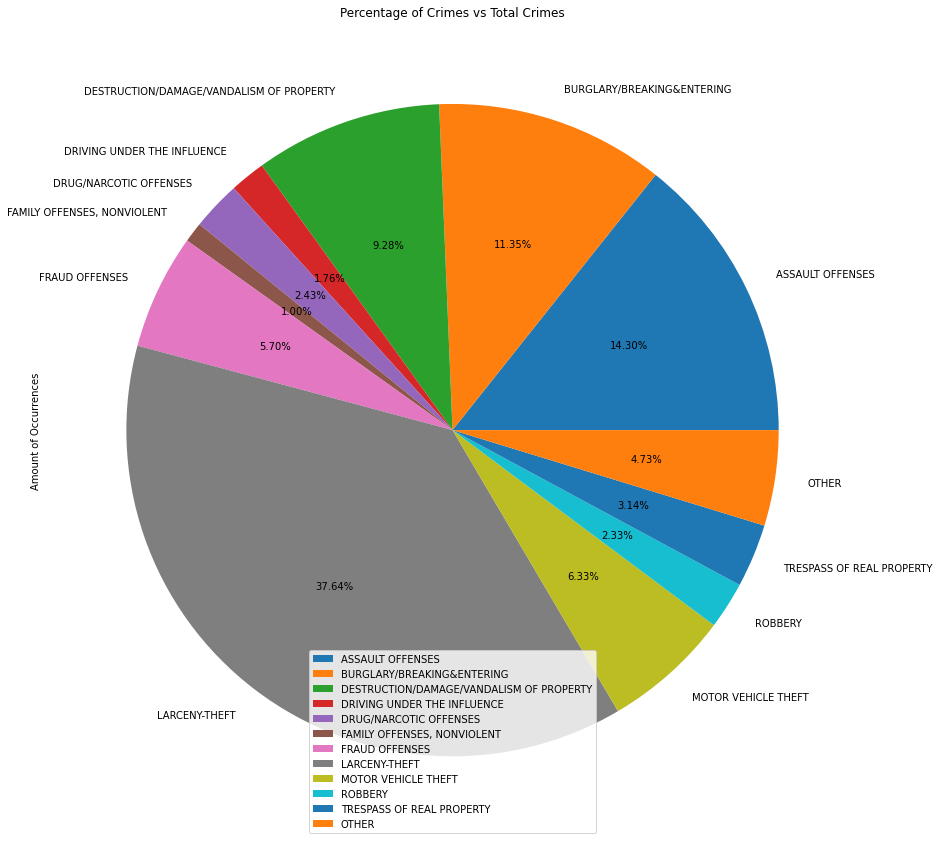

In [30]:
# create a pie plot
occurrence_final_plot = occurrence_final_df.plot(
    kind="pie",
    figsize=(15, 15),
    autopct='%1.2f%%',
    y='Amount of Occurrences',
    title="Percentage of Crimes vs Total Crimes"
)

# display the plot
occurrence_final_plot.legend(loc="lower center")

In [31]:
# calculate the amount of occurrences per date using groupby and size()
occurrence_by_date_df = concat.groupby(["Report DateTime","Offense Parent Group"]).size()

# display the dataframe
occurrence_by_date_df

Report DateTime  Offense Parent Group                    
2008-01-01       ASSAULT OFFENSES                            52
                 BAD CHECKS                                   1
                 BURGLARY/BREAKING&ENTERING                  12
                 COUNTERFEITING/FORGERY                       1
                 DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    26
                                                             ..
2022-12-03       LARCENY-THEFT                                8
                 MOTOR VEHICLE THEFT                          7
                 ROBBERY                                      1
                 SEX OFFENSES                                 2
                 STOLEN PROPERTY OFFENSES                     1
Length: 84567, dtype: int64

In [32]:
# create an interactive line plot
occurrence_by_date_plot = occurrence_by_date_df.hvplot.line(
    x="Report DateTime",
    xlabel="Date",
    ylabel="Amount of Occurrences",
    groupby="Offense Parent Group",
    title="Amount of Crimes in Seattle by Report Date and Type from 2008-2022",
    sort_date=True,
    rot=90, 
    frame_height=400, 
    frame_width=1050
)

# display the plot
occurrence_by_date_plot

:DynamicMap   [Offense Parent Group]
   :Curve   [Report DateTime]   (0)

In [33]:
# calculate the amount of occurrences per neighborhood using groupby and .size()
occurrence_by_neighborhood_df = concat.groupby(["Neighborhood","Report DateTime"]).size()

# display the dataframe
occurrence_by_neighborhood_df

Neighborhood     Report DateTime
ALASKA JUNCTION  2008-01-01         1
                 2008-01-02         3
                 2008-01-03         1
                 2008-01-04         1
                 2008-01-05         2
                                   ..
WALLINGFORD      2022-11-26         3
                 2022-11-27         1
                 2022-11-29         1
                 2022-11-30         6
                 2022-12-01         1
Length: 242062, dtype: int64

In [34]:
# create an interactive line plot
occurrence_by_neighborhood_plot = occurrence_by_neighborhood_df.hvplot.line(
    x="Report DateTime",
    xlabel="Date",
    ylabel="Amount of Occurrences",
    groupby="Neighborhood",
    title="Amount of Crimes in Seattle by Report Date and Type from 2008-2022",
    sort_date=True,
    rot=90, 
    frame_height=400,
    frame_width=1000
)

# display the plot
occurrence_by_neighborhood_plot

:DynamicMap   [Neighborhood]
   :Curve   [Report DateTime]   (0)

In [35]:
# create a new dataframe with the amount of motor vehicle thefts from 2008 thru 2010
# narrow the 'Offense Parent Group' to 'MOTOR VEHICLE THEFT' only
# narrow the 'Report DateTime' to Jan 1, 2008 thru Dec 31, 2010
mvt_2008_2010_df = concat[(concat['Offense Parent Group'] == 'MOTOR VEHICLE THEFT') & (concat['Report DateTime'] >= '2008-01-01') & (concat['Report DateTime'] <= '2010-12-31')]

# calculate the amount of occurrences using groupby and .size()
mvt_2008_2010_df = mvt_2008_2010_df.groupby(['Offense Parent Group','Report DateTime']).size()

# reset the index column to the default
mvt_2008_2010_df = mvt_2008_2010_df.reset_index()

# rename the column '0' to 'Amount of Occurrences'
mvt_2008_2010_df = mvt_2008_2010_df.rename(columns={0: "Amount of Occurrences"})

# set the index column to 'Report DateTime'
mvt_2008_2010_df = mvt_2008_2010_df.set_index("Report DateTime")

# display the dataframe
mvt_2008_2010_df

Offense Parent Group  Amount of Occurrences
Report DateTime                                            
2008-01-01       MOTOR VEHICLE THEFT                     11
2008-01-02       MOTOR VEHICLE THEFT                     11
2008-01-03       MOTOR VEHICLE THEFT                      7
2008-01-04       MOTOR VEHICLE THEFT                      4
2008-01-05       MOTOR VEHICLE THEFT                      6
...                              ...                    ...
2010-12-27       MOTOR VEHICLE THEFT                      6
2010-12-28       MOTOR VEHICLE THEFT                     12
2010-12-29       MOTOR VEHICLE THEFT                      6
2010-12-30       MOTOR VEHICLE THEFT                      5
2010-12-31       MOTOR VEHICLE THEFT                      5

[1096 rows x 2 columns]

In [36]:
# create a new dataframe with the amount of assaults from 2008 thru 2010
# narrow the 'Offense Parent Group' to 'ASSAULT OFFENSES' only
# narrow the 'Report DateTime' to Jan 1, 2008 thru Dec 31, 2010
assault_2008_2010_df = concat[(concat['Offense Parent Group'] == 'ASSAULT OFFENSES') & (concat['Report DateTime'] >= '2008-01-01') & (concat['Report DateTime'] <= '2010-12-31')]

# calculate the amount of occurrences using groupby and .size()
assault_2008_2010_df = assault_2008_2010_df.groupby(['Offense Parent Group','Report DateTime']).size()

# reset the index column to the default
assault_2008_2010_df = assault_2008_2010_df.reset_index()

# rename the column '0' to 'Amount of Occurrences'
assault_2008_2010_df = assault_2008_2010_df.rename(columns={0: "Amount of Occurrences"})

# set the index column to 'Report DateTime'
assault_2008_2010_df = assault_2008_2010_df.set_index("Report DateTime")

# display the dataframe
assault_2008_2010_df

Offense Parent Group  Amount of Occurrences
Report DateTime                                            
2008-01-01          ASSAULT OFFENSES                     52
2008-01-02          ASSAULT OFFENSES                     15
2008-01-03          ASSAULT OFFENSES                     15
2008-01-04          ASSAULT OFFENSES                     25
2008-01-05          ASSAULT OFFENSES                     25
...                              ...                    ...
2010-12-27          ASSAULT OFFENSES                     20
2010-12-28          ASSAULT OFFENSES                     22
2010-12-29          ASSAULT OFFENSES                     20
2010-12-30          ASSAULT OFFENSES                     24
2010-12-31          ASSAULT OFFENSES                     31

[1096 rows x 2 columns]

In [37]:
# create a new dataframe with the amount of assaults from 2008 thru 2010
# narrow the 'Offense Parent Group' to 'BURGLARY/BREAKING&ENTERING' only
# narrow the 'Report DateTime' to Jan 1, 2008 thru Dec 31, 2010
burglary_2008_2010_df = concat[(concat['Offense Parent Group'] == 'BURGLARY/BREAKING&ENTERING') & (concat['Report DateTime'] >= '2008-01-01') & (concat['Report DateTime'] <= '2010-12-31')]

# calculate the amount of occurrences using groupby and .size()
burglary_2008_2010_df = burglary_2008_2010_df.groupby(['Offense Parent Group','Report DateTime']).size()

# reset the index column to the default
burglary_2008_2010_df = burglary_2008_2010_df.reset_index()

# rename the column '0' to 'Amount of Occurrences'
burglary_2008_2010_df = burglary_2008_2010_df.rename(columns={0: "Amount of Occurrences"})

# set the index column to 'Report DateTime'
burglary_2008_2010_df = burglary_2008_2010_df.set_index("Report DateTime")

# display the dataframe
burglary_2008_2010_df

Offense Parent Group  Amount of Occurrences
Report DateTime                                                   
2008-01-01       BURGLARY/BREAKING&ENTERING                     12
2008-01-02       BURGLARY/BREAKING&ENTERING                     25
2008-01-03       BURGLARY/BREAKING&ENTERING                     27
2008-01-04       BURGLARY/BREAKING&ENTERING                     24
2008-01-05       BURGLARY/BREAKING&ENTERING                     21
...                                     ...                    ...
2010-12-27       BURGLARY/BREAKING&ENTERING                     31
2010-12-28       BURGLARY/BREAKING&ENTERING                     19
2010-12-29       BURGLARY/BREAKING&ENTERING                     28
2010-12-30       BURGLARY/BREAKING&ENTERING                     14
2010-12-31       BURGLARY/BREAKING&ENTERING                     18

[1096 rows x 2 columns]

<AxesSubplot:title={'center':'Amount of occurrences of Motor Vehicle Theft, Assault and Burglary in Seattle from 2008 - 2010'}, xlabel='Report DateTime', ylabel='Amount of occurrences'>

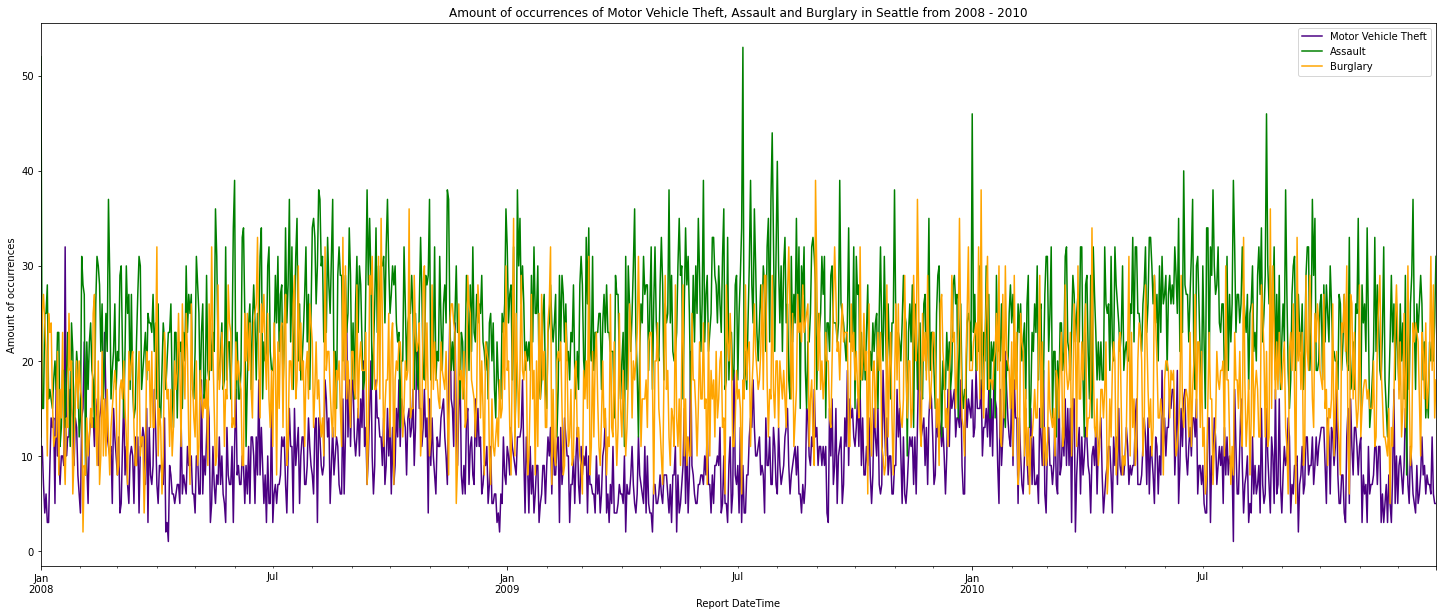

In [38]:
# plot all three crimes together on the same plot

# motor vehicle theft dataframe from 2008-2010
mvt_2008_2010_df["Amount of Occurrences"].plot(
    legend=True,
    figsize=(25,10),
    title="Amount of occurrences of Motor Vehicle Theft, Assault and Burglary in Seattle from 2008 - 2010",
    color="indigo",
    label="Motor Vehicle Theft",
    xlabel="Time",
    ylabel="Amount of occurrences"
)

# assault dataframe from 2008-2010
assault_2008_2010_df["Amount of Occurrences"].plot(
    legend=True,
    color="green",
    label="Assault"
)

# burglary dataframe from 2008-2010
burglary_2008_2010_df["Amount of Occurrences"].plot(
    legend=True,
    color="orange",
    label="Burglary"
)

In [39]:
# create a new dataframe with the amount of assaults from 2018 thru 2020
# narrow the 'Offense Parent Group' to 'MOTOR VEHICLE THEFT' only
# narrow the 'Report DateTime' to Jan 1, 2018 thru Dec 31, 2020
mvt_2018_2020_df = concat[(concat['Offense Parent Group'] == 'MOTOR VEHICLE THEFT') & (concat['Report DateTime'] >= '2018-01-01') & (concat['Report DateTime'] <= '2020-12-31')]

# calculate the amount of occurrences using groupby and .size()
mvt_2018_2020_df = mvt_2018_2020_df.groupby(['Offense Parent Group','Report DateTime']).size()

# reset the index column to the default
mvt_2018_2020_df = mvt_2018_2020_df.reset_index()

# rename the column '0' to 'Amount of Occurrences'
mvt_2018_2020_df = mvt_2018_2020_df.rename(columns={0: "Amount of Occurrences"})

# set the index column to 'Report DateTime'
mvt_2018_2020_df = mvt_2018_2020_df.set_index("Report DateTime")

# display the dataframe
mvt_2018_2020_df

Offense Parent Group  Amount of Occurrences
Report DateTime                                            
2018-01-01       MOTOR VEHICLE THEFT                      3
2018-01-02       MOTOR VEHICLE THEFT                      9
2018-01-03       MOTOR VEHICLE THEFT                     17
2018-01-04       MOTOR VEHICLE THEFT                      7
2018-01-05       MOTOR VEHICLE THEFT                     13
...                              ...                    ...
2020-12-27       MOTOR VEHICLE THEFT                     12
2020-12-28       MOTOR VEHICLE THEFT                     11
2020-12-29       MOTOR VEHICLE THEFT                     19
2020-12-30       MOTOR VEHICLE THEFT                     15
2020-12-31       MOTOR VEHICLE THEFT                     25

[1096 rows x 2 columns]

In [40]:
# create a new dataframe with the amount of assaults from 2018 thru 2020
# narrow the 'Offense Parent Group' to 'ASSAULT OFFENSES' only
# narrow the 'Report DateTime' to Jan 1, 2018 thru Dec 31, 2020
assault_2018_2020_df = concat[(concat['Offense Parent Group'] == 'ASSAULT OFFENSES') & (concat['Report DateTime'] >= '2018-01-01') & (concat['Report DateTime'] <= '2020-12-31')]

# calculate the amount of occurrences using groupby and .size()
assault_2018_2020_df = assault_2018_2020_df.groupby(['Offense Parent Group','Report DateTime']).size()

# reset the index column to the default
assault_2018_2020_df = assault_2018_2020_df.reset_index()

# rename the column '0' to 'Amount of Occurrences'
assault_2018_2020_df = assault_2018_2020_df.rename(columns={0: "Amount of Occurrences"})

# set the index column to 'Report DateTime'
assault_2018_2020_df = assault_2018_2020_df.set_index("Report DateTime")

# display the dataframe
assault_2018_2020_df

Offense Parent Group  Amount of Occurrences
Report DateTime                                            
2018-01-01          ASSAULT OFFENSES                     36
2018-01-02          ASSAULT OFFENSES                     22
2018-01-03          ASSAULT OFFENSES                     28
2018-01-04          ASSAULT OFFENSES                     23
2018-01-05          ASSAULT OFFENSES                     26
...                              ...                    ...
2020-12-27          ASSAULT OFFENSES                     30
2020-12-28          ASSAULT OFFENSES                     29
2020-12-29          ASSAULT OFFENSES                     19
2020-12-30          ASSAULT OFFENSES                     28
2020-12-31          ASSAULT OFFENSES                     23

[1096 rows x 2 columns]

In [41]:
# create a new dataframe with the amount of assaults from 2018 thru 2020
# narrow the 'Offense Parent Group' to 'BURGLARY/BREAKING&ENTERING' only
# narrow the 'Report DateTime' to Jan 1, 2018 thru Dec 31, 2020
burglary_2018_2020_df = concat[(concat['Offense Parent Group'] == 'BURGLARY/BREAKING&ENTERING') & (concat['Report DateTime'] >= '2018-01-01') & (concat['Report DateTime'] <= '2020-12-31')]

# calculate the amount of occurrences using groupby and .size()
burglary_2018_2020_df = burglary_2018_2020_df.groupby(['Offense Parent Group','Report DateTime']).size()

# reset the index column to the default
burglary_2018_2020_df = burglary_2018_2020_df.reset_index()

# rename the column '0' to 'Amount of Occurrences'
burglary_2018_2020_df = burglary_2018_2020_df.rename(columns={0: "Amount of Occurrences"})

# set the index column to 'Report DateTime'
burglary_2018_2020_df = burglary_2018_2020_df.set_index("Report DateTime")

# display the dataframe
burglary_2018_2020_df

Offense Parent Group  Amount of Occurrences
Report DateTime                                                   
2018-01-01       BURGLARY/BREAKING&ENTERING                     23
2018-01-02       BURGLARY/BREAKING&ENTERING                     27
2018-01-03       BURGLARY/BREAKING&ENTERING                     25
2018-01-04       BURGLARY/BREAKING&ENTERING                     32
2018-01-05       BURGLARY/BREAKING&ENTERING                     28
...                                     ...                    ...
2020-12-27       BURGLARY/BREAKING&ENTERING                     32
2020-12-28       BURGLARY/BREAKING&ENTERING                     39
2020-12-29       BURGLARY/BREAKING&ENTERING                     56
2020-12-30       BURGLARY/BREAKING&ENTERING                     39
2020-12-31       BURGLARY/BREAKING&ENTERING                     14

[1096 rows x 2 columns]

<AxesSubplot:title={'center':'Amount of occurrences of Motor Vehicle Theft, Assault and Burglary in Seattle from 2018 - 2020'}, xlabel='Report DateTime', ylabel='Amount of Occurrences'>

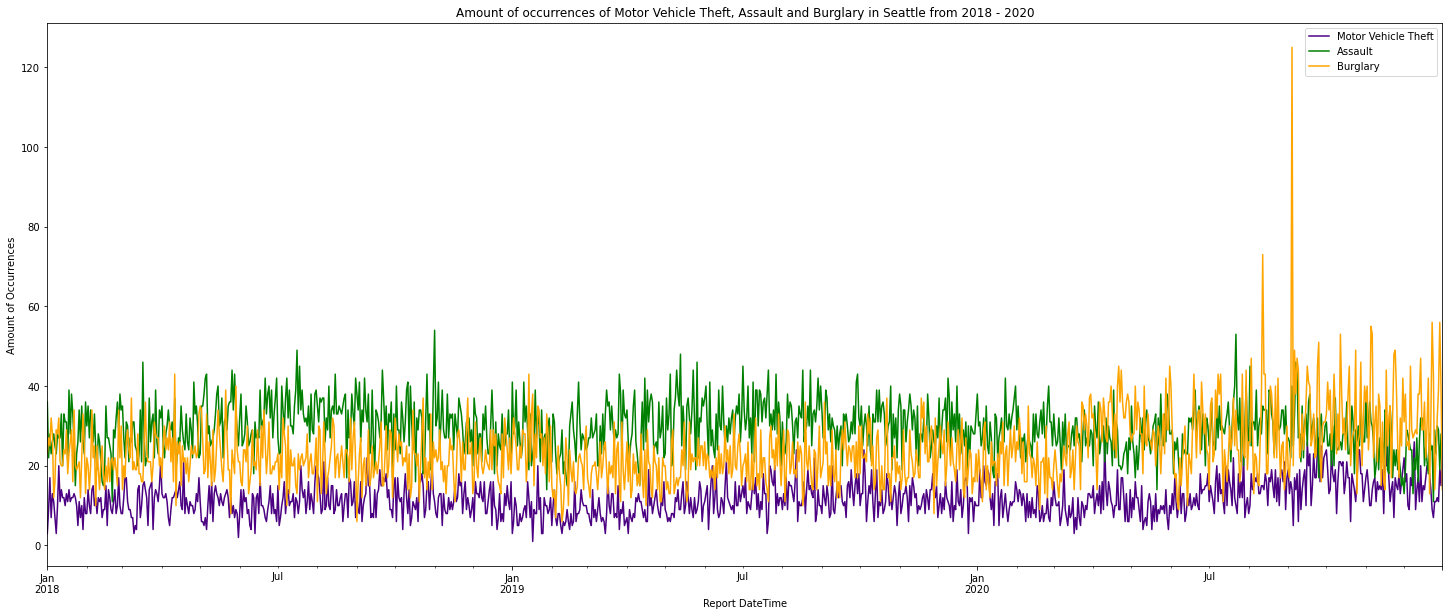

In [42]:
# plot all three crimes together on the same plot

# motor vehicle theft dataframe from 2018-2020
mvt_2018_2020_df["Amount of Occurrences"].plot(
    legend=True,
    figsize=(25,10),
    title="Amount of occurrences of Motor Vehicle Theft, Assault and Burglary in Seattle from 2018 - 2020",
    color="indigo",
    label="Motor Vehicle Theft",
    xlabel="Time",
    ylabel="Amount of Occurrences"
)

# assault dataframe from 2018-2020
assault_2018_2020_df["Amount of Occurrences"].plot(
    legend=True,
    color="green",
    label="Assault"
)

# burglary dataframe from 2018-2020
burglary_2018_2020_df["Amount of Occurrences"].plot(
    legend=True,
    color="orange",
    label="Burglary"
)

In [43]:
# use pandas to read the csv file "Locations.csv" from the Resources folder
# set the index column to 'Neighborhood'
neighborhood_csv = pd.read_csv(
    "./Resources/Locations.csv",
    index_col="Neighborhood"
)

# display the first and last five rows of the dataframe
display(neighborhood_csv.head())
display(neighborhood_csv.tail())

Lat       Lon
Neighborhood                      
ALASKA JUNCTION  47.5612 -122.3866
ALKI             47.5755 -122.4107
BALLARD NORTH    47.6611 -122.3265
BALLARD SOUTH    47.6659 -122.3830
BELLTOWN         47.6147 -122.3448

Lat       Lon
Neighborhood                        
SOUTH BEACON HILL  47.5491 -122.3070
SOUTH DELRIDGE     47.5269 -122.3607
SOUTH PARK         47.5265 -122.3244
UNIVERSITY         47.6628 -122.3139
WALLINGFORD        47.6614 -122.3421

In [44]:
# calculate the amount of occurrences by neighborhood using groupby and .size()
neighborhood_data_df = concat.groupby(["Neighborhood"]).size()

# display the first and last five rows of the dataframe
display(neighborhood_data_df.head())
display(neighborhood_data_df.tail())

Neighborhood
ALASKA JUNCTION    14481
ALKI                5218
BALLARD NORTH      20884
BALLARD SOUTH      32199
BELLTOWN           27481
dtype: int64

Neighborhood
SOUTH BEACON HILL     4510
SOUTH DELRIDGE        4156
SOUTH PARK            8603
UNIVERSITY           40199
WALLINGFORD          18778
dtype: int64

In [45]:
# join the two dataframes together using the pandas concat function
# drop any null values
all_neighborhood_data_df = pd.concat(
    [neighborhood_data_df, neighborhood_csv],
    axis="columns",
    sort=False
).dropna()

# display the first and last five rows of the dataframe
display(all_neighborhood_data_df.head())
display(all_neighborhood_data_df.tail())

0      Lat       Lon
Neighborhood                             
ALASKA JUNCTION  14481  47.5612 -122.3866
ALKI              5218  47.5755 -122.4107
BALLARD NORTH    20884  47.6611 -122.3265
BALLARD SOUTH    32199  47.6659 -122.3830
BELLTOWN         27481  47.6147 -122.3448

0      Lat       Lon
Neighborhood                               
SOUTH BEACON HILL   4510  47.5491 -122.3070
SOUTH DELRIDGE      4156  47.5269 -122.3607
SOUTH PARK          8603  47.5265 -122.3244
UNIVERSITY         40199  47.6628 -122.3139
WALLINGFORD        18778  47.6614 -122.3421

In [46]:
# rename the '0' column to 'Amount of Occurrences'
all_neighborhood_data_df = all_neighborhood_data_df.rename(columns={0: "Amount of Occurrences"})

# reset the index to the default
all_neighborhood_data_df = all_neighborhood_data_df.reset_index()

# display the first and last five rows of the dataframe
display(all_neighborhood_data_df.head())
display(all_neighborhood_data_df.tail())

Neighborhood  Amount of Occurrences      Lat       Lon
0  ALASKA JUNCTION                  14481  47.5612 -122.3866
1             ALKI                   5218  47.5755 -122.4107
2    BALLARD NORTH                  20884  47.6611 -122.3265
3    BALLARD SOUTH                  32199  47.6659 -122.3830
4         BELLTOWN                  27481  47.6147 -122.3448

Neighborhood  Amount of Occurrences      Lat       Lon
53  SOUTH BEACON HILL                   4510  47.5491 -122.3070
54     SOUTH DELRIDGE                   4156  47.5269 -122.3607
55         SOUTH PARK                   8603  47.5265 -122.3244
56         UNIVERSITY                  40199  47.6628 -122.3139
57        WALLINGFORD                  18778  47.6614 -122.3421

In [47]:
# geoviews plot of crime density by neighborhood
occurrence_by_neighborhood_geoviews = all_neighborhood_data_df.hvplot.points(
    "Lon",
    "Lat",
    geo=True,
    size=500,
    color="Amount of Occurrences",
    frame_width=790, 
    frame_height=790, 
    tiles="OSM",
    title="Crime Density by Neighborhood in Seattle, Washington from 2008-2022",
    alpha=0.8,
    xlabel="Latitude",
    ylabel="Longitude"
)

# display the plot
occurrence_by_neighborhood_geoviews

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Amount of Occurrences)

In [48]:
# create a new dataframe showing all offenses from September 1, 2008 thru December 31, 2008
concat_2008_df = concat[(concat['Report DateTime'] > '2008-09-01') & (concat['Report DateTime'] <= '2008-12-31')]

# calculate the amount of occurrences using groupby and .size()
concat_2008_occurrences = concat_2008_df.groupby(["Report DateTime","Offense Parent Group"]).size()

# display the dataframe
concat_2008_occurrences

Report DateTime  Offense Parent Group                
2008-09-02       ASSAULT OFFENSES                        24
                 BAD CHECKS                               2
                 BURGLARY/BREAKING&ENTERING              21
                 COUNTERFEITING/FORGERY                   2
                 CURFEW/LOITERING/VAGRANCY VIOLATIONS     1
                                                         ..
2008-12-31       MOTOR VEHICLE THEFT                      7
                 PROSTITUTION OFFENSES                    1
                 ROBBERY                                  5
                 TRESPASS OF REAL PROPERTY                3
                 WEAPON LAW VIOLATIONS                    2
Length: 1964, dtype: int64

In [49]:
# interactive plot of all types of crimes in 2008
concat_2008_plot = concat_2008_occurrences.hvplot.line(
    x="Report DateTime",
    xlabel="Date",
    ylabel="Amount of Occurrences",
    groupby="Offense Parent Group",
    title="Amount of Crimes in Seattle by Report Date and Type in 2008",
    color='blue',
    rot=90, 
    frame_height=400, 
    frame_width=1050
)

# display the plot
concat_2008_plot

:DynamicMap   [Offense Parent Group]
   :Curve   [Report DateTime]   (0)

In [50]:
# create a new dataframe showing all offenses from September 1, 2012 - December 31, 2012
concat_2012_df = concat[(concat['Report DateTime'] > '2012-09-01') & (concat['Report DateTime'] <= '2012-12-31')]

# calculate the amount of occurrences using groupby and .size()
concat_2012_occurrences = concat_2012_df.groupby(["Report DateTime","Offense Parent Group"]).size()

# display the dataframe
concat_2012_occurrences

Report DateTime  Offense Parent Group                    
2012-09-02       ASSAULT OFFENSES                            28
                 BAD CHECKS                                   1
                 BURGLARY/BREAKING&ENTERING                   7
                 DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    10
                 DRIVING UNDER THE INFLUENCE                  3
                                                             ..
2012-12-31       ROBBERY                                      2
                 SEX OFFENSES                                 1
                 STOLEN PROPERTY OFFENSES                     2
                 TRESPASS OF REAL PROPERTY                    2
                 WEAPON LAW VIOLATIONS                        2
Length: 1821, dtype: int64

In [51]:
# interactive plot of all types of crimes in 2012
concat_2012_plot = concat_2012_occurrences.hvplot.line(
    x="Report DateTime",
    xlabel="Date",
    ylabel="Amount of Occurrences",
    groupby="Offense Parent Group",
    title="Amount of Crimes in Seattle by Report Date and Type in 2012",
    color='blue',
    rot=90, 
    frame_height=400, 
    frame_width=1050
)

# display the plot
concat_2012_plot

:DynamicMap   [Offense Parent Group]
   :Curve   [Report DateTime]   (0)

In [52]:
# create a new dataframe showing all offenses from September 1, 2016 - December 31, 2016
concat_2016_df = concat[(concat['Report DateTime'] > '2016-09-01') & (concat['Report DateTime'] <= '2016-12-31')]

# calculate the amount of occurrences using groupby and .size()
concat_2016_occurrences = concat_2016_df.groupby(["Report DateTime","Offense Parent Group"]).size()

# display the dataframe
concat_2016_occurrences

Report DateTime  Offense Parent Group                    
2016-09-02       ASSAULT OFFENSES                            24
                 BAD CHECKS                                   2
                 BURGLARY/BREAKING&ENTERING                  27
                 COUNTERFEITING/FORGERY                       1
                 DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    10
                                                             ..
2016-12-31       ROBBERY                                      1
                 SEX OFFENSES                                 1
                 STOLEN PROPERTY OFFENSES                     2
                 TRESPASS OF REAL PROPERTY                   12
                 WEAPON LAW VIOLATIONS                        3
Length: 1871, dtype: int64

In [53]:
# interactive plot of all types of crimes in 2016
concat_2016_plot = concat_2016_occurrences.hvplot.line(
    x="Report DateTime",
    xlabel="Date",
    ylabel="Amount of Occurrences",
    groupby="Offense Parent Group",
    title="Amount of Crimes in Seattle by Report Date and Type in 2016",
    color='blue',
    rot=90, 
    frame_height=400, 
    frame_width=1050
)

# display the plot
concat_2016_plot

:DynamicMap   [Offense Parent Group]
   :Curve   [Report DateTime]   (0)

In [54]:
# create a new dataframe showing all offenses from September 1, 2020 - December 31, 2020
concat_2020_df = concat[(concat['Report DateTime'] > '2020-09-01') & (concat['Report DateTime'] <= '2020-12-31')]

# calculate the amount of occurrences using groupby and .size()
concat_2020_occurrences = concat_2020_df.groupby(["Report DateTime","Offense Parent Group"]).size()

# display the dataframe
concat_2020_occurrences

Report DateTime  Offense Parent Group                    
2020-09-02       ASSAULT OFFENSES                            26
                 BURGLARY/BREAKING&ENTERING                  17
                 COUNTERFEITING/FORGERY                       3
                 DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY     9
                 DRIVING UNDER THE INFLUENCE                  2
                                                             ..
2020-12-31       LARCENY-THEFT                               22
                 MOTOR VEHICLE THEFT                         25
                 ROBBERY                                      4
                 STOLEN PROPERTY OFFENSES                     1
                 TRESPASS OF REAL PROPERTY                    4
Length: 1768, dtype: int64

In [55]:
# interactive plot of all types of crimes in 2020
concat_2020_plot = concat_2020_occurrences.hvplot.line(
    x="Report DateTime",
    xlabel="Date",
    ylabel="Amount of Occurrences",
    groupby="Offense Parent Group",
    title="Amount of Crimes in Seattle by Report Date and Type in 2020",
    color='blue',
    rot=90, 
    frame_height=400, 
    frame_width=1050
)

# display the plot
concat_2020_plot

:DynamicMap   [Offense Parent Group]
   :Curve   [Report DateTime]   (0)